# Examen Analyses Exploratoire de donnes

<font color='blue'>Author:  </font>Ricardo Vallejo.


# Partie I : Questions de compréhension

Q1 : Le numero K de variables quantitatives cest le numero maximo de axes factoriels q nous pouvons avoir. 


Q2:  Zero, les variables qualitatives pour apporter l'information a l'analysis, mais la nature de valeurs 
    discret ne permet pas une analysis conventional de correlation et variance.

Q3:  Standarisation, et normalisation, le deuxieme pour assurer que tous le features ont le meme scale, et le premiere
     pour optimiser les algorithmes en assurant que stadndard deviation a 1 et mean a 0.

Q4:  Standarisation est la regles moins dans les cas ou les algorithmes a traiter font la reduction.

Q5: Retenir les composantes principales correspondant a des valeurs propres superieures a 1.

# Partie II : Analyse factorielle des données (30 points)

# 1) Load Data

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
from fanalysis.mca import MCA

dataOriginal = pd.read_excel("DataLiqueurs1.xlsx",sheet_name="Feuil1",index_col=0)
pd.set_option('display.max_rows', None)
n_data = dataOriginal.shape[0]

dataOriginal

C:\Users\valm044\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Region,Soil,Odor,Fruity,Flower,AromaI,AromaP,AromaQ,Spice,Acidity,Balance,Smooth,Intensity,Harmony
Individu,,,,,,,,,,,,,,
2EL,Saumur,Env1,3.407,2.885,2.320,3.259,2.963,3.200,1.840,2.107,3.250,2.731,2.857,3.143
1CHA,Saumur,Env1,3.370,2.560,2.440,2.962,2.808,2.926,1.739,2.107,2.926,2.500,2.893,2.964
1FON,Bourgueuil,Env1,3.250,2.769,2.192,3.077,2.800,3.077,2.250,2.179,3.321,2.679,3.074,3.143
1VAU,Chinon,Env2,3.160,2.391,2.083,2.542,2.583,2.478,2.167,3.179,2.333,1.680,2.462,2.038
1DAM,Saumur,Reference,3.536,3.160,2.231,3.615,3.296,3.462,2.148,2.571,3.464,3.036,3.643,3.643
2BOU,Bourgueuil,Reference,3.179,2.800,2.240,3.214,3.148,3.321,2.148,2.393,3.286,2.857,3.464,3.500
1BOI,Bourgueuil,Reference,3.429,3.038,2.200,3.250,3.222,3.385,2.385,2.607,3.464,2.857,3.643,3.556
3EL,Saumur,Env1,3.654,2.520,2.320,3.280,3.160,2.962,2.444,2.179,3.179,2.786,3.321,3.296
DOM1,Chinon,Env1,3.357,3.000,2.040,3.148,2.893,3.308,2.125,2.286,3.143,2.821,3.148,3.286


## 2) Identifiez les différentes variables et leurs types. (1 pt)

In [220]:
dataOriginal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     21 non-null     object 
 1   Soil       21 non-null     object 
 2   Odor       21 non-null     float64
 3   Fruity     21 non-null     float64
 4   Flower     21 non-null     float64
 5   AromaI     21 non-null     float64
 6   AromaP     21 non-null     float64
 7   AromaQ     21 non-null     float64
 8   Spice      21 non-null     float64
 9   Acidity    21 non-null     float64
 10  Balance    21 non-null     float64
 11  Smooth     21 non-null     float64
 12  Intensity  21 non-null     float64
 13  Harmony    21 non-null     float64
dtypes: float64(12), object(2)
memory usage: 2.5+ KB


In [229]:
v_qualitative = ['Region', 'Soil']

v_quantitative = ['Odor','Fruity','Flower','AromaI','AromaP','AromaQ','Spice',
                  'Acidity','Balance','Smooth','Intensity','Harmony']

Les variables quantitatives sont float values et les qualitatives sont objects.


# 3. Identifier les modalités des variables qualitatives. (1 pt

In [230]:
X = pd.get_dummies(dataOriginal[v_qualitative],prefix='',prefix_sep='')
X

,Bourgueuil,Chinon,Saumur,Env1,Env2,Env4,Reference
Individu,,,,,,,
2EL,0,0,1,1,0,0,0
1CHA,0,0,1,1,0,0,0
1FON,1,0,0,1,0,0,0
1VAU,0,1,0,0,1,0,0
1DAM,0,0,1,0,0,0,1
2BOU,1,0,0,0,0,0,1
1BOI,1,0,0,0,0,0,1
3EL,0,0,1,1,0,0,0
DOM1,0,1,0,1,0,0,0


In [231]:
#La liste de modalites est:

X.columns

Index(['Bourgueuil', 'Chinon', 'Saumur', 'Env1', 'Env2', 'Env4', 'Reference'], dtype='object')

## 4) Construisez deux ensembles (matrices) de données df1 et df2 contenant respectivement les données quantitatives et les données qualitatives. (2 pts)

In [232]:
df1 = dataOriginal[v_quantitative]
df1

,Odor,Fruity,Flower,AromaI,AromaP,AromaQ,Spice,Acidity,Balance,Smooth,Intensity,Harmony
Individu,,,,,,,,,,,,
2EL,3.407,2.885,2.320,3.259,2.963,3.200,1.840,2.107,3.250,2.731,2.857,3.143
1CHA,3.370,2.560,2.440,2.962,2.808,2.926,1.739,2.107,2.926,2.500,2.893,2.964
1FON,3.250,2.769,2.192,3.077,2.800,3.077,2.250,2.179,3.321,2.679,3.074,3.143
1VAU,3.160,2.391,2.083,2.542,2.583,2.478,2.167,3.179,2.333,1.680,2.462,2.038
1DAM,3.536,3.160,2.231,3.615,3.296,3.462,2.148,2.571,3.464,3.036,3.643,3.643
2BOU,3.179,2.800,2.240,3.214,3.148,3.321,2.148,2.393,3.286,2.857,3.464,3.500
1BOI,3.429,3.038,2.200,3.250,3.222,3.385,2.385,2.607,3.464,2.857,3.643,3.556
3EL,3.654,2.520,2.320,3.280,3.160,2.962,2.444,2.179,3.179,2.786,3.321,3.296
DOM1,3.357,3.000,2.040,3.148,2.893,3.308,2.125,2.286,3.143,2.821,3.148,3.286


In [233]:
df2 = dataOriginal[v_qualitative]
df2

,Region,Soil
Individu,,
2EL,Saumur,Env1
1CHA,Saumur,Env1
1FON,Bourgueuil,Env1
1VAU,Chinon,Env2
1DAM,Saumur,Reference
2BOU,Bourgueuil,Reference
1BOI,Bourgueuil,Reference
3EL,Saumur,Env1
DOM1,Chinon,Env1


# Étape 2 : Analyse en composante principale (ACP) (15 points)

### Déterminez les valeurs propres de cet ensemble de données en se basant sur la matrice de corrélation des variables. (2 points)

In [234]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(df1)
df1_std = scaler.transform(df1)
df1_standarized = pd.DataFrame(df1_std, columns = v_quantitative)
df1_standarized


,Odor,Fruity,Flower,AromaI,AromaP,AromaQ,Spice,Acidity,Balance,Smooth,Intensity,Harmony
0,0.060115,0.175057,1.073029,0.249504,-0.082489,0.442250,-1.680172,-1.188684,0.372576,0.140496,-0.849736,-0.011480
1,-0.128991,-1.327792,1.888725,-0.944783,-0.729479,-0.446265,-2.181741,-1.188684,-0.625459,-0.431272,-0.750722,-0.426422
2,-0.742307,-0.361344,0.202953,-0.482348,-0.762872,0.043391,0.355899,-0.881139,0.591282,0.011787,-0.252904,-0.011480
3,-1.202295,-2.109274,-0.537971,-2.633673,-1.668659,-1.899019,-0.056282,3.390311,-2.452110,-2.460927,-1.936136,-2.572992
4,0.719430,1.446699,0.468054,1.681039,1.307497,1.291852,-0.150636,0.793269,1.031773,0.895429,1.312062,1.147575
5,-1.105186,-0.217996,0.529231,0.068551,0.689725,0.834623,-0.150636,0.032951,0.483469,0.452370,0.819744,0.816085
6,0.172556,0.882552,0.257333,0.213313,0.998611,1.042160,1.026312,0.947041,1.031773,0.452370,1.312062,0.945899
7,1.322524,-1.512758,1.073029,0.333948,0.739815,-0.329526,1.319308,-0.881139,0.153871,0.276632,0.426440,0.343191
8,-0.195434,0.706835,-0.830262,-0.196846,-0.374678,0.792468,-0.264855,-0.424094,0.042978,0.363263,-0.049376,0.320010
9,-0.885415,0.364647,-0.830262,-0.482348,-1.163589,-0.926193,-0.677035,-0.120821,0.261684,-0.431272,-0.849736,-0.428740


In [235]:
df1_standarized.describe().round(2)

,Odor,Fruity,Flower,AromaI,AromaP,AromaQ,Spice,Acidity,Balance,Smooth,Intensity,Harmony
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02
min,-2.59,-2.11,-2.65,-2.63,-2.82,-1.90,-2.18,-1.19,-2.45,-2.46,-2.71,-2.57
25%,-0.56,-0.36,-0.54,-0.48,-0.37,-0.60,-0.33,-0.58,-0.07,-0.43,-0.35,-0.34
50%,-0.13,0.18,0.20,0.21,0.22,0.42,-0.09,0.03,0.26,0.36,0.23,0.15
75%,0.44,0.54,0.73,0.50,0.69,0.79,0.50,0.19,0.59,0.45,0.53,0.57
max,1.75,1.56,1.89,1.68,1.31,1.29,2.14,3.39,1.14,1.51,1.38,1.48


In [236]:
correlation_matrix = np.corrcoef(df1_standarized.transpose())

In [237]:
eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)

In [238]:
eig_vals.round(3)

array([6.829, 2.219, 0.979, 0.842, 0.621, 0.175, 0.12 , 0.092, 0.012,
       0.02 , 0.038, 0.053])

## 2) En se basant sur le critère de Kaiser, combien de composantes principales devrons-nous retenir ? (2 points)


In [239]:
Deux, parce que ces valeur propes sont plus grandes que 1.  Lambda1 = 6.829 et lambda2=2.219

SyntaxError: invalid syntax (<ipython-input-239-2ce0fc1a6ae8>, line 1)

## 3) Réalisez une ACP. (3 points)

In [240]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(df1_standarized)

principalComponentsDf1 = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])
principalComponentsDf1['Individu'] = dataOriginal.index
principalComponentsDf1

,PC1,PC2,Individu
0,-0.363817,-2.065201,2EL
1,1.586219,-2.569026,1CHA
2,0.378611,-0.890657,1FON
3,6.739187,0.903552,1VAU
4,-3.514961,0.435258,1DAM
5,-1.257501,-0.788138,2BOU
6,-2.349558,0.828301,1BOI
7,-0.814019,0.984619,3EL
8,-0.394708,-0.412568,DOM1
9,1.580747,-0.804378,1TUR


In [241]:
print(pca2.explained_variance_ratio_.round(4))

[0.569  0.1849]


La première composante accapare 56.9% de l’information disponible. 75.3% avec les deux premiers facteurs.

In [242]:
# Les deux premiere axes factorielles sont chaque row:

pca2.components_.round(3)

array([[-0.184, -0.287, -0.15 , -0.33 , -0.341, -0.33 , -0.045,  0.115,
        -0.351, -0.36 , -0.349, -0.369],
       [ 0.44 , -0.048, -0.406,  0.171,  0.226, -0.185,  0.575,  0.311,
        -0.199, -0.148,  0.187, -0.03 ]])

In [243]:
df1_standarized['Individu'] = dataOriginal.index

# 4)

<function matplotlib.pyplot.show(*args, **kw)>

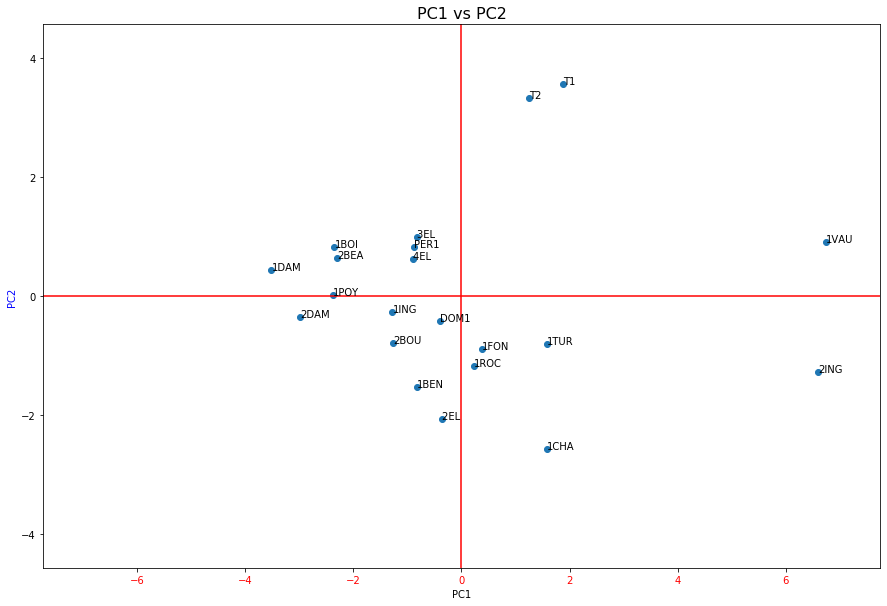

In [244]:
fig, axes = plt.subplots(figsize=(15,10))
#Axes
xmin = principalComponentsDf1['PC1'].max()
ymin = principalComponentsDf1['PC2'].max()

axes.set_xlim(-xmin-1, xmin+1)
axes.set_ylim(-ymin-1, ymin+1)

axes.axhline(0,color='red') # x = 0
axes.axvline(0,color='red') # y = 0

#Labels
plt.title('PC1 vs PC2', color = 'black', fontsize = 16)
plt.xlabel('PC1',color = 'black')
plt.ylabel('PC2', color = 'blue')
plt.xticks(color = 'red')
plt.yticks(color = 'black')

#Data graphique
plt.scatter(principalComponentsDf1['PC1'], principalComponentsDf1['PC2'])

#Including tags for any plot in order to identify in the new artifitiel dimension PC1, PC2
for i, row in principalComponentsDf1.iterrows():
    plt.annotate(principalComponentsDf1['Individu'].iloc[i], (principalComponentsDf1['PC1'].iloc[i], principalComponentsDf1['PC2'].iloc[i]))
plt.show

# 5) Interpretation

Tous les individues sont relativement proches dans les 2 premieres axes factorieles, mais 2ING, 1VAU, 
sont eloigne de set majeur et apporte grandement a PC1. T1 et T2, cest demarquent aussi et l'apport cest plus sur PC2

2EL, pour exmaple apporte peu a l'axe factoriell PC1.

Les datas sont moins disperses sur l'axe factorielle 2.

Ca convient avoir plus de dispersion dans les donnes pour obtenir meilleur model.


# Étape 3 : Analyse factorielle de données mixtes (AFDM) (10 points)

# 1) 1. Préparez les données qualitatives en vue d’une analyse factorielle mixte. (2 points)


In [245]:
#proportions
pk=np.mean(K_disj.values,axis=0)
print('proportions: ',pk)

proportions:  [0.28571429 0.19047619 0.52380952 0.33333333 0.23809524 0.0952381
 0.33333333]


In [246]:
K_disj = pd.get_dummies(dataOriginal[v_qualitative],prefix='',prefix_sep='')

X2_std = K_disj.values/np.sqrt(pk)

df2_standarized = pd.DataFrame(X2_std, columns = K_disj.columns)
df2_standarized


,Bourgueuil,Chinon,Saumur,Env1,Env2,Env4,Reference
0,0.000000,0.000000,1.381699,1.732051,0.00000,0.00000,0.000000
1,0.000000,0.000000,1.381699,1.732051,0.00000,0.00000,0.000000
2,1.870829,0.000000,0.000000,1.732051,0.00000,0.00000,0.000000
3,0.000000,2.291288,0.000000,0.000000,2.04939,0.00000,0.000000
4,0.000000,0.000000,1.381699,0.000000,0.00000,0.00000,1.732051
5,1.870829,0.000000,0.000000,0.000000,0.00000,0.00000,1.732051
6,1.870829,0.000000,0.000000,0.000000,0.00000,0.00000,1.732051
7,0.000000,0.000000,1.381699,1.732051,0.00000,0.00000,0.000000
8,0.000000,2.291288,0.000000,1.732051,0.00000,0.00000,0.000000
9,0.000000,0.000000,1.381699,0.000000,2.04939,0.00000,0.000000


# 2) Réalisez une AFDM (utilisez la fonction PCA de fanalysis). (3 points)

In [270]:
listcol=list(df1_standarized.columns)+list(df2_standarized.columns)
print(listcol)

['Odor', 'Fruity', 'Flower', 'AromaI', 'AromaP', 'AromaQ', 'Spice', 'Acidity', 'Balance', 'Smooth', 'Intensity', 'Harmony', 'Individu', 'Bourgueuil', 'Chinon', 'Saumur', 'Env1', 'Env2', 'Env4', 'Reference']


In [271]:
X= np.concatenate((df1_standarized,df2_standarized),axis=1)
Xdf = pd.DataFrame(X, columns = listcol)
Xdf = Xdf.drop('Individu', 1)
Xdf = Xdf.astype(float).round(3)
Xdf

,Odor,Fruity,Flower,AromaI,AromaP,AromaQ,Spice,Acidity,Balance,Smooth,Intensity,Harmony,Bourgueuil,Chinon,Saumur,Env1,Env2,Env4,Reference
0,0.060,0.175,1.073,0.250,-0.082,0.442,-1.680,-1.189,0.373,0.140,-0.850,-0.011,0.000,0.000,1.382,1.732,0.000,0.00,0.000
1,-0.129,-1.328,1.889,-0.945,-0.729,-0.446,-2.182,-1.189,-0.625,-0.431,-0.751,-0.426,0.000,0.000,1.382,1.732,0.000,0.00,0.000
2,-0.742,-0.361,0.203,-0.482,-0.763,0.043,0.356,-0.881,0.591,0.012,-0.253,-0.011,1.871,0.000,0.000,1.732,0.000,0.00,0.000
3,-1.202,-2.109,-0.538,-2.634,-1.669,-1.899,-0.056,3.390,-2.452,-2.461,-1.936,-2.573,0.000,2.291,0.000,0.000,2.049,0.00,0.000
4,0.719,1.447,0.468,1.681,1.307,1.292,-0.151,0.793,1.032,0.895,1.312,1.148,0.000,0.000,1.382,0.000,0.000,0.00,1.732
5,-1.105,-0.218,0.529,0.069,0.690,0.835,-0.151,0.033,0.483,0.452,0.820,0.816,1.871,0.000,0.000,0.000,0.000,0.00,1.732
6,0.173,0.883,0.257,0.213,0.999,1.042,1.026,0.947,1.032,0.452,1.312,0.946,1.871,0.000,0.000,0.000,0.000,0.00,1.732
7,1.323,-1.513,1.073,0.334,0.740,-0.330,1.319,-0.881,0.154,0.277,0.426,0.343,0.000,0.000,1.382,1.732,0.000,0.00,0.000
8,-0.195,0.707,-0.830,-0.197,-0.375,0.792,-0.265,-0.424,0.043,0.363,-0.049,0.320,0.000,2.291,0.000,1.732,0.000,0.00,0.000
9,-0.885,0.365,-0.830,-0.482,-1.164,-0.926,-0.677,-0.121,0.262,-0.431,-0.850,-0.429,0.000,0.000,1.382,0.000,2.049,0.00,0.000


In [272]:
Xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Odor        21 non-null     float64
 1   Fruity      21 non-null     float64
 2   Flower      21 non-null     float64
 3   AromaI      21 non-null     float64
 4   AromaP      21 non-null     float64
 5   AromaQ      21 non-null     float64
 6   Spice       21 non-null     float64
 7   Acidity     21 non-null     float64
 8   Balance     21 non-null     float64
 9   Smooth      21 non-null     float64
 10  Intensity   21 non-null     float64
 11  Harmony     21 non-null     float64
 12  Bourgueuil  21 non-null     float64
 13  Chinon      21 non-null     float64
 14  Saumur      21 non-null     float64
 15  Env1        21 non-null     float64
 16  Env2        21 non-null     float64
 17  Env4        21 non-null     float64
 18  Reference   21 non-null     float64
dtypes: float64(19)
memory usage: 3.

In [273]:
print('Dimension de la matrice de donnees preparees',Xdf.shape[0],Xdf.shape[1])

Dimension de la matrice de donnees preparees 21 19


In [274]:
listcol

['Odor',
 'Fruity',
 'Flower',
 'AromaI',
 'AromaP',
 'AromaQ',
 'Spice',
 'Acidity',
 'Balance',
 'Smooth',
 'Intensity',
 'Harmony',
 'Individu',
 'Bourgueuil',
 'Chinon',
 'Saumur',
 'Env1',
 'Env2',
 'Env4',
 'Reference']

# 2)

In [275]:
X2 = Xdf.to_numpy()

from fanalysis.pca  import PCA
afdm=PCA()
afdm.fit(X2)
None


In [276]:
p = X.shape[1] # All
p2 = len(v_qualitative) # Z2.shape[1] # Cualitatives
Fmax = p - p2  # numero de variables quantitatives es el max numero de valores propios
s=np.arange(1,Fmax+2)

XVarianceInfo=pd.DataFrame(np.transpose(afdm.eig_),columns=['Val.P','%','Cumul %'], index=s)
XVarianceInfo.round(3)

,Val.P,%,Cumul %
1,7.519,39.575,39.575
2,3.487,18.353,57.928
3,2.373,12.489,70.417
4,1.922,10.114,80.531
5,1.047,5.513,86.044
6,0.872,4.591,90.635
7,0.659,3.468,94.103
8,0.434,2.286,96.389
9,0.296,1.559,97.948
10,0.137,0.721,98.669


Les (H = 4) premiers facteurs seraient donc les seules pertinentes avec des variances égales respectivement à 7.51 et 3.48 ret 2.37. Ils restituent 70.4% de l’information disponible. on preserve 70.4% de la variance cumulee.

# 3)

In [277]:
#afdm.row_coord_ 

ContributionInfo=pd.DataFrame(afdm.row_coord_[:,:2],columns=['Coord F1','Coord F2'], index=dataOriginal.index)
display(ContributionInfo)

,Coord F1,Coord F2
Individu,,
2EL,-0.231635,1.270584
1CHA,1.614595,1.588573
1FON,0.621592,2.004926
1VAU,6.918569,-0.406906
1DAM,-3.955580,-0.713425
2BOU,-1.664551,1.623127
1BOI,-2.696385,0.505404
3EL,-0.660666,-0.849806
DOM1,0.094430,1.062414


On peut confirmer numeriquement le obtenu dans les graphique, T1 et T2 apporte le plus a axe F2, 
pendant que pour F1 predominent 2DAM, 2ING



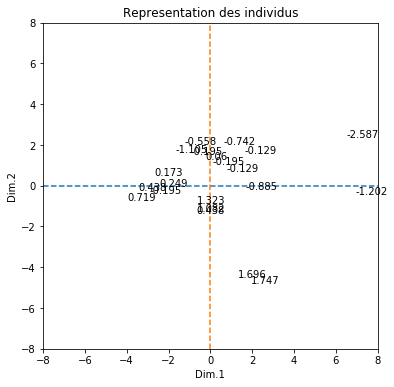

In [279]:
fix,ax=plt.subplots(figsize=(6,6))
ax.axis([-8,+8,-8,+8])
ax.plot([-8,+8],[0,0],linestyle='--')
ax.plot([0,0],[-8,+8],linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title('Representation des individus')
for i in range(Xdf.shape[0]):
    ax.text(afdm.row_coord_[i,0],afdm.row_coord_[i,1],Xdf.iloc[i, 0])
plt.show() 


